# Taylor Expansion

### Objective
The goal of this experiment is to study the Taylor series approximation for the function:

$$f(x) = \frac{1}{x+1}$$

We will analyze the accuracy of the approximation over the interval $0 \le x \le 1$ by varying two parameters:
1.  We will use $a = 0$, $a = 0.5$, and $a = 0.8$.
2.  We will use $n = 3$ and $n = 5$ terms.

For each case, we will plot the exact function alongside the Taylor approximation to visualize how the choice of expansion point and the number of terms affects the accuracy.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Mathematical Formulation

To write the code, we first need the general formula for the Taylor expansion of our function.

The Taylor series for a function $f(x)$ centered at $x = a$ is given by:

$$f(x) = \sum_{k=0}^{\infty} \frac{f^{(k)}(a)}{k!} (x-a)^k$$

**Step 1: Find the derivatives of $f(x)$**
Our function is $f(x) = (x+1)^{-1}$.
* $f'(x) = -1(x+1)^{-2}$
* $f''(x) = 2(x+1)^{-3}$
* $f'''(x) = -6(x+1)^{-4}$

Following this pattern, the $k$-th derivative is:
$$f^{(k)}(x) = (-1)^k k! (x+1)^{-(k+1)}$$

**Step 2: Evaluate coefficients at $x = a$**
Substitute $x=a$ into the derivative formula:
$$f^{(k)}(a) = (-1)^k k! (a+1)^{-(k+1)}$$

**Step 3: Simplify the term coefficient**
The coefficient in the Taylor series is $\frac{f^{(k)}(a)}{k!}$.
$$\frac{f^{(k)}(a)}{k!} = \frac{(-1)^k k! (a+1)^{-(k+1)}}{k!} = \frac{(-1)^k}{(a+1)^{k+1}}$$

**Step 4: Final Series**
Substituting this back into the sum, the approximation for $N$ terms (from $k=0$ to $N-1$) is:

$$f(x) \approx \sum_{k=0}^{N-1} (-1)^k \frac{(x-a)^k}{(a+1)^{k+1}}$$

### Defining functions for calculation :

In [8]:
def func(x):
    return 1/(x+1)

def taylor_expansion(x,a,n):

    y_appx = 0
    for k in range(n):
        term = ((-1)**k * (x - a)**k) / ((a + 1)**(k + 1))
        y_appx += term

    return y_appx    


### Defining variables :

In [13]:
x_values = np.linspace(0,1,100) #Create 100 evenly spaced points bw 0 and 1
expansion_points = [0,0.5,0.8]
terms = [3,5]

### Plotting :

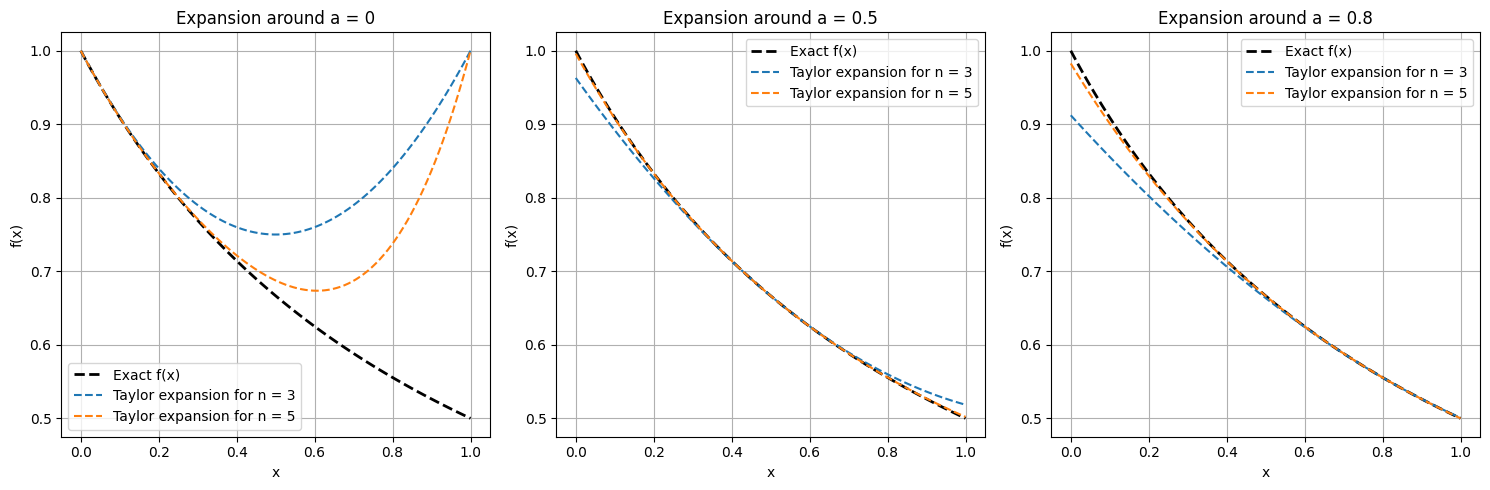

In [14]:
plt.figure(figsize=(15,5))

for i,a in enumerate(expansion_points):

    plt.subplot(1,3,i+1)
    plt.plot(x_values,func(x_values),'k--',linewidth=2,label = "Exact f(x)")

    for n in terms:

        y_taylor = taylor_expansion(x_values,a,n)
        plt.plot(x_values,y_taylor,'--',label = f"Taylor expansion for n = {n}")

    plt.title(f"Expansion around a = {a}")
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()    

## Observations :

From the graphs generated above, we can make the following observations regarding the behavior of the Taylor series approximation:

**1. Effect of Expansion Point ($a$):**
* **Case $a = 0$:** The approximation is nearly perfect at the beginning of the interval ($x=0$). However, as $x$ increases towards 1, the deviation between the Taylor series and the exact function grows significantly.
* **Case $a = 0.5$:** The approximation is very accurate around the center of the interval. The error increases slightly as we move towards the edges ($x=0$ and $x=1$), but the overall fit is more balanced across the entire domain compared to the other cases.
* **Case $a = 0.8$:** The approximation is accurate near $x=0.8$ and $x=1$, but it diverges rapidly for smaller values of $x$. At $x=0$, the error is very large.

**2. Effect of Number of Terms ($n$):**
* In all three cases, the curve for **$n=5$** (orange line) follows the exact function (black dashed line) more closely than the curve for **$n=3$** (blue line).
* The improvement from increasing $n$ is most noticeable in regions where the approximation starts to fail (e.g., near $x=1$ when $a=0$).

## Conclusion

The results of this experiment confirm the theoretical expectations of Taylor Series expansions.

**Justification of Results:**
1.  **Why does accuracy decrease away from $a$?**
    The error in a Taylor approximation depends on the term $(x-a)^n$. As the distance between the evaluation point $x$ and the expansion point $a$ increases, the value of $(x-a)^n$ grows, causing the error to accumulate. This explains why the expansion at $a=0$ fails at $x=1$, and the expansion at $a=0.8$ fails at $x=0$.

2.  **Why does increasing $n$ improve accuracy?**
    Higher-order terms in the series include higher-order derivatives ($f''$, $f'''$, etc.). These terms carry more information about the curvature and "wiggles" of the function. By including terms up to $n=5$, we allow the polynomial to bend more accurately to match the shape of $f(x) = 1/(x+1)$, thereby reducing the error.

**Final Conclusion:**
For the specific interval $0 \le x \le 1$, the expansion around **$a = 0.5$** provides the most useful approximation because it minimizes the maximum distance $|x-a|$ for any point in the domain.